In [1]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
site=['RUSH','UCMC','UMN','JHU','U of Michigan','NU','Emory','OHSU']

## Discrimination

In [2]:
roc_files = glob.glob("roc_curve_data_*.csv")
roc_dataframes = [pd.read_csv(file) for file in roc_files]
merged_roc_dataframe = pd.concat(roc_dataframes, ignore_index=True)

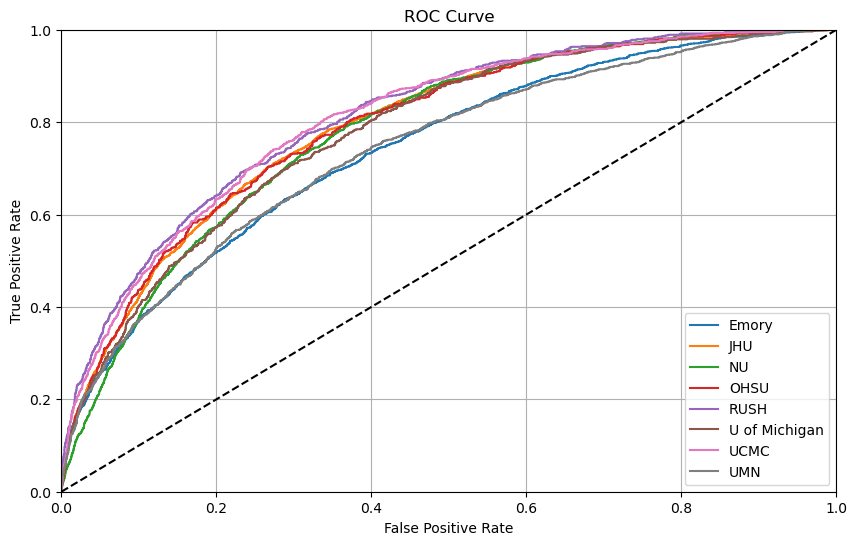

In [3]:

# Plot ROC AUC for each site
plt.figure(figsize=(10, 6))

sites = merged_roc_dataframe['site'].unique()
for site in sites:
    site_data = merged_roc_dataframe[merged_roc_dataframe['site'] == site]
    plt.plot(site_data['fpr'], site_data['tpr'], label=f'{site}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Calibration 

In [4]:
cal_files = glob.glob("calibration_data_*.csv")
cal_dataframes = [pd.read_csv(file) for file in cal_files]
merged_cal_dataframe = pd.concat(cal_dataframes, ignore_index=True)

In [5]:
merged_cal_dataframe.to_csv('Rush_Uofc_cal_plot_df.csv',index=False)

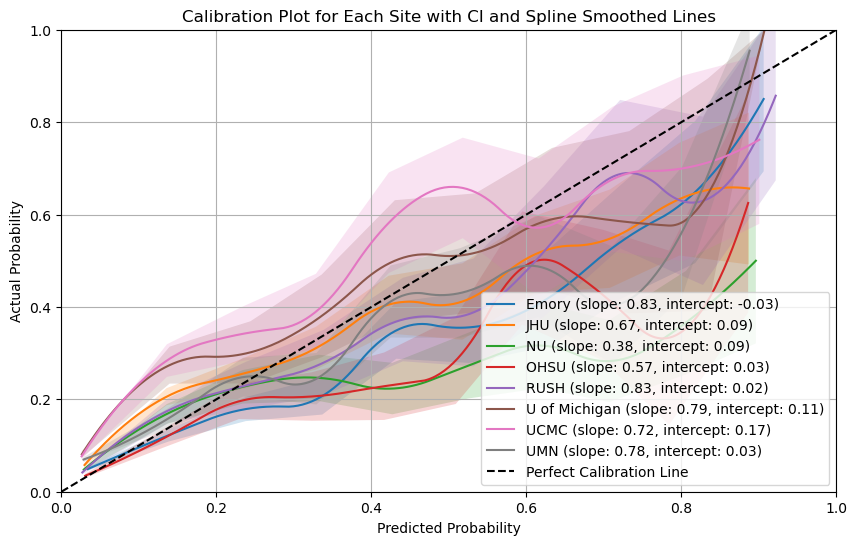

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression

# Assuming merged_cal_dataframe is already defined
sites = merged_cal_dataframe['site'].unique()

# Create an empty list to store the results
results = []

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Loop over each site and perform the linear regression
for site in sites:
    site_data = merged_cal_dataframe[merged_cal_dataframe['site'] == site]
    
    # Fit the linear regression model
    model = LinearRegression()
    X = site_data[['predicted_prob']]
    y = site_data['actual_prob']
    model.fit(X, y)
    
    # Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Append the results
    results.append({'Site': site, 'Slope': slope, 'Intercept': intercept})
    
    # Sort the data by predicted_prob to ensure smooth interpolation
    site_data = site_data.sort_values(by='predicted_prob')
    
    # Smoothing the line with spline interpolation
    x_new = np.linspace(site_data['predicted_prob'].min(), site_data['predicted_prob'].max(), 300)
    spl = make_interp_spline(site_data['predicted_prob'], site_data['actual_prob'], k=2)
    y_smooth = spl(x_new)
    
    # Plot the smoothed line
    plt.plot(x_new, y_smooth, label=f'{site} (slope: {slope:.2f}, intercept: {intercept:.2f})')
    plt.fill_between(site_data['predicted_prob'], site_data['lower_ci'], site_data['upper_ci'], alpha=0.2)

# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration Line')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Calibration Plot for Each Site with CI and Spline Smoothed Lines')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)



In [7]:
results_df

,Site,Slope,Intercept
0,Emory,0.831776,-0.025383
1,JHU,0.668570,0.087516
2,NU,0.379313,0.086440
3,OHSU,0.572322,0.029776
4,RUSH,0.832976,0.017803
5,U of Michigan,0.790359,0.106333
6,UCMC,0.718217,0.166996
7,UMN,0.780670,0.031340


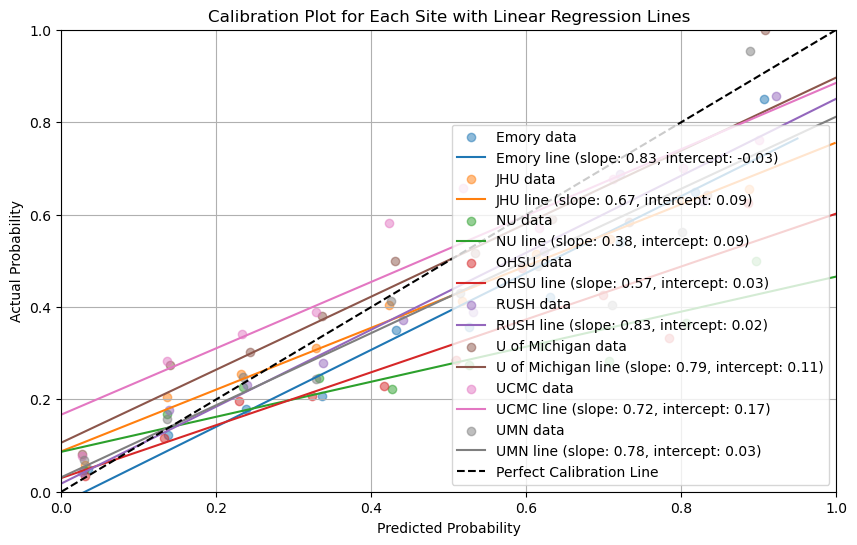

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming merged_cal_dataframe is already defined
sites = merged_cal_dataframe['site'].unique()

# Create an empty list to store the results
results = []

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Loop over each site and perform the linear regression
for site in sites:
    site_data = merged_cal_dataframe[merged_cal_dataframe['site'] == site]
    
    # Fit the linear regression model
    model = LinearRegression()
    X = site_data[['predicted_prob']]
    y = site_data['actual_prob']
    model.fit(X, y)
    
    # Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Append the results
    results.append({'Site': site, 'Slope': slope, 'Intercept': intercept})
    
    # Plot the actual data points
    plt.scatter(site_data['predicted_prob'], site_data['actual_prob'], label=f'{site} data', alpha=0.5)
    
    # Plot the linear regression line
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, label=f'{site} line (slope: {slope:.2f}, intercept: {intercept:.2f})')

# Plot the perfect calibration line
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration Line')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Probability')
plt.title('Calibration Plot for Each Site with Linear Regression Lines')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Clinical utility 

In [9]:
top_files = glob.glob("Top_N_percentile_PPV_*.csv")
top_dataframes = [pd.read_csv(file) for file in top_files]
merged_top_dataframe = pd.concat(top_dataframes, ignore_index=True)

In [10]:
top_files

['Top_N_percentile_PPV_Emory.csv',
 'Top_N_percentile_PPV_JHU.csv',
 'Top_N_percentile_PPV_NU.csv',
 'Top_N_percentile_PPV_OHSU.csv',
 'Top_N_percentile_PPV_RUSH.csv',
 'Top_N_percentile_PPV_U of Michigan.csv',
 'Top_N_percentile_PPV_UCMC.csv',
 'Top_N_percentile_PPV_UMN.csv']

c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


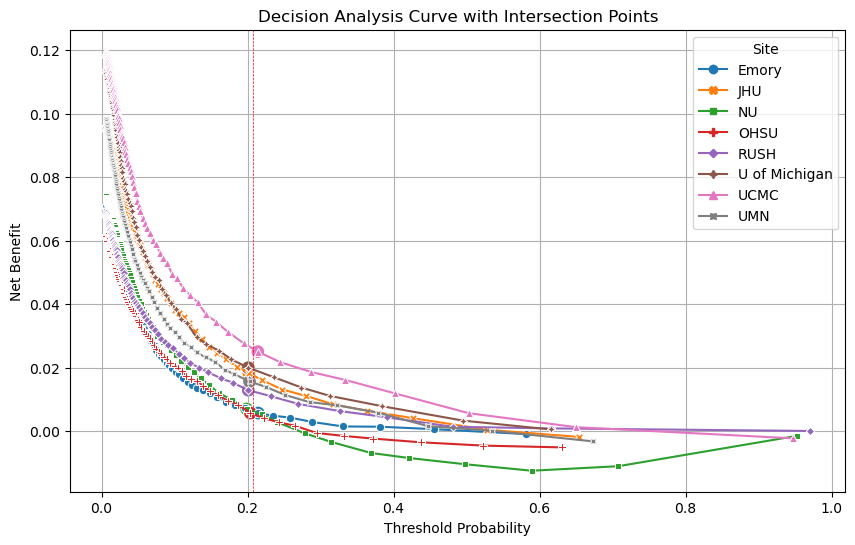

In [12]:
df = merged_top_dataframe

# Calculate n and net_benefit
df['n'] = df['TN'] + df['FP'] + df['FN'] + df['TP']
df['net_benefit'] = (df['TP'] - df['FP'] * (df['Thr Value'] / (1 - df['Thr Value']))) / df['n']

# Find intersection points
threshold_value = 0.208  # Example threshold value
intersection_points = df.loc[(df.groupby('site_name')['Thr Value'].apply(lambda x: (x - threshold_value).abs().idxmin()))]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Thr Value', y='net_benefit', hue='site_name', style='site_name', markers=True, dashes=False)
plt.axvline(x=threshold_value, color='red', linestyle='--', linewidth=0.5)
sns.scatterplot(data=intersection_points, x='Thr Value', y='net_benefit', hue='site_name', s=100, legend=False)

plt.xlabel('Threshold Probability')
plt.ylabel('Net Benefit')
plt.title('Decision Analysis Curve with Intersection Points')
plt.legend(title='Site')
plt.grid(True)
plt.show()

### metric

In [13]:
met_files = glob.glob("result_metrics_2_*.csv")
met_dataframes = [pd.read_csv(file) for file in met_files]
merged_met_dataframe = pd.concat(met_dataframes, ignore_index=True)

# plot on one

In [14]:
site_mapping = {
    'RUSH': 'RUSH University',
    'UCMC': 'University of Chicago',
    'UMN': 'University of Minnesota',
    'JHU': 'Johns Hopkins Health System',
    'U of Michigan': 'University of Michigan',
    'NU': 'Northwestern University',
    'Emory': 'Emory University',
    'OHSU': 'Oregon Health & Science University'
}

In [15]:
merged_met_dataframe['SiteName'] = merged_met_dataframe['SiteName'].map(site_mapping)

In [16]:
merged_top_dataframe['site_name'] = merged_top_dataframe['site_name'].map(site_mapping)

In [17]:
merged_roc_dataframe['site'] = merged_roc_dataframe['site'].map(site_mapping)

In [ ]:
merged_cal_dataframe['site'] = merged_cal_dataframe['site'].map(site_mapping)
merged_cal_dataframe

In [19]:

# Calculate 'n' and 'net_benefit'
df = merged_top_dataframe
df['n'] = df['TN'] + df['FP'] + df['FN'] + df['TP']
df['net_benefit'] = (df['TP'] - df['FP'] * (df['Thr Value'] / (1 - df['Thr Value']))) / df['n']

# Find intersection points
threshold_value = 0.208  # Example threshold value
intersection_points = df.loc[(df.groupby('site_name')['Thr Value'].apply(lambda x: (x - threshold_value).abs().idxmin()))]

# Extract AUC and Brier Score values from merged_met_dataframe
auc_values = merged_met_dataframe[merged_met_dataframe['Metric'] == 'ROC AUC'].set_index('SiteName')['Value'].to_dict()
auc_ci_lower = merged_met_dataframe[merged_met_dataframe['Metric'] == 'ROC AUC'].set_index('SiteName')['CI Lower'].to_dict()
auc_ci_upper = merged_met_dataframe[merged_met_dataframe['Metric'] == 'ROC AUC'].set_index('SiteName')['CI Upper'].to_dict()
brier_scores = merged_met_dataframe[merged_met_dataframe['Metric'] == 'Brier Score Loss'].set_index('SiteName')['Value'].to_dict()


c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


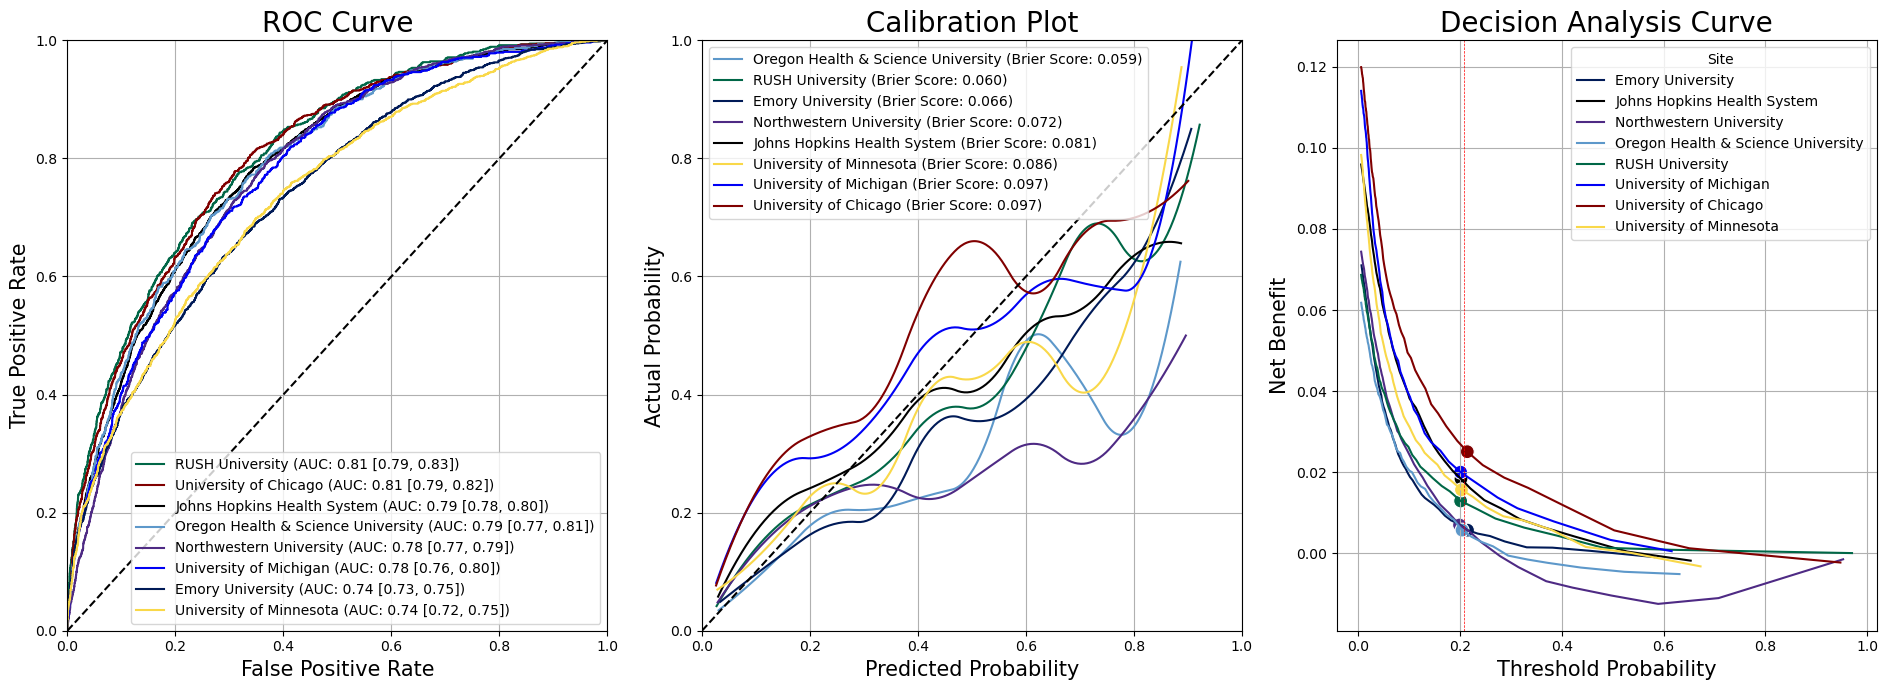

In [20]:
# Sorting AUC and Brier Scores
sorted_auc = sorted(auc_values.items(), key=lambda item: item[1], reverse=True)
sorted_brier = sorted(brier_scores.items(), key=lambda item: item[1])

# Sorted lists of site names based on AUC and Brier Scores
sorted_sites_auc = [site for site, value in sorted_auc]
sorted_sites_brier = [site for site, value in sorted_brier]

# Define colors for each site
site_colors = {
    'RUSH University': '#006747',
    'University of Chicago': '#800000',
    'University of Minnesota': '#F9D849',
    'Johns Hopkins Health System': '#000000',
    'University of Michigan': '#0000F5',
    'Northwestern University': '#4E2A84',
    'Emory University': '#001A57',
    'Oregon Health & Science University': '#5D98CA'
}


# Plotting
fig, axs = plt.subplots(1, 3, figsize=(19, 7))

# ROC Plot
axs[0].set_title('ROC Curve',  fontsize=20)
for site in sorted_sites_auc:
    site_data = merged_roc_dataframe[merged_roc_dataframe['site'] == site]
    auc = auc_values[site]
    ci_lower = auc_ci_lower[site]
    ci_upper = auc_ci_upper[site]
    label = f'{site} (AUC: {auc:.2f} [{ci_lower:.2f}, {ci_upper:.2f}])'
    axs[0].plot(site_data['fpr'], site_data['tpr'], label=label, color=site_colors.get(site, 'black'))
axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.0])
axs[0].set_xlabel('False Positive Rate', fontsize=15)
axs[0].set_ylabel('True Positive Rate', fontsize=15)
axs[0].legend(loc='lower right')
axs[0].grid(True)

# Calibration Plot
axs[1].set_title('Calibration Plot',fontsize=20)
for site in sorted_sites_brier:
    site_data = merged_cal_dataframe[merged_cal_dataframe['site'] == site]
    site_data = site_data.sort_values(by='predicted_prob')
    x_new = np.linspace(site_data['predicted_prob'].min(), site_data['predicted_prob'].max(), 300)
    spl = make_interp_spline(site_data['predicted_prob'], site_data['actual_prob'], k=2)
    y_smooth = spl(x_new)
    brier_score = brier_scores[site]
    label = f'{site} (Brier Score: {brier_score:.3f})'
    axs[1].plot(x_new, y_smooth, label=label, color=site_colors.get(site, 'black'))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('Predicted Probability', fontsize=15)
axs[1].set_ylabel('Actual Probability', fontsize=15)
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Clinical Utility Plot
axs[2].set_title('Decision Analysis Curve',fontsize=20)
sns.lineplot(ax=axs[2], data=merged_top_dataframe, x='Thr Value', y='net_benefit', hue='site_name', palette=site_colors, style='site_name', markers=False, dashes=False)
axs[2].axvline(x=threshold_value, color='red', linestyle='--', linewidth=0.5)
sns.scatterplot(ax=axs[2], data=intersection_points, x='Thr Value', y='net_benefit', hue='site_name', palette=site_colors, s=100, legend=False)
axs[2].set_xlabel('Threshold Probability', fontsize=15)
axs[2].set_ylabel('Net Benefit', fontsize=15)
axs[2].legend(title='Site')
axs[2].grid(True)

plt.tight_layout()
fig.savefig('Final_TriPOD_plot_600dpi.png', dpi=600)
plt.show()


c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vchaudha\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


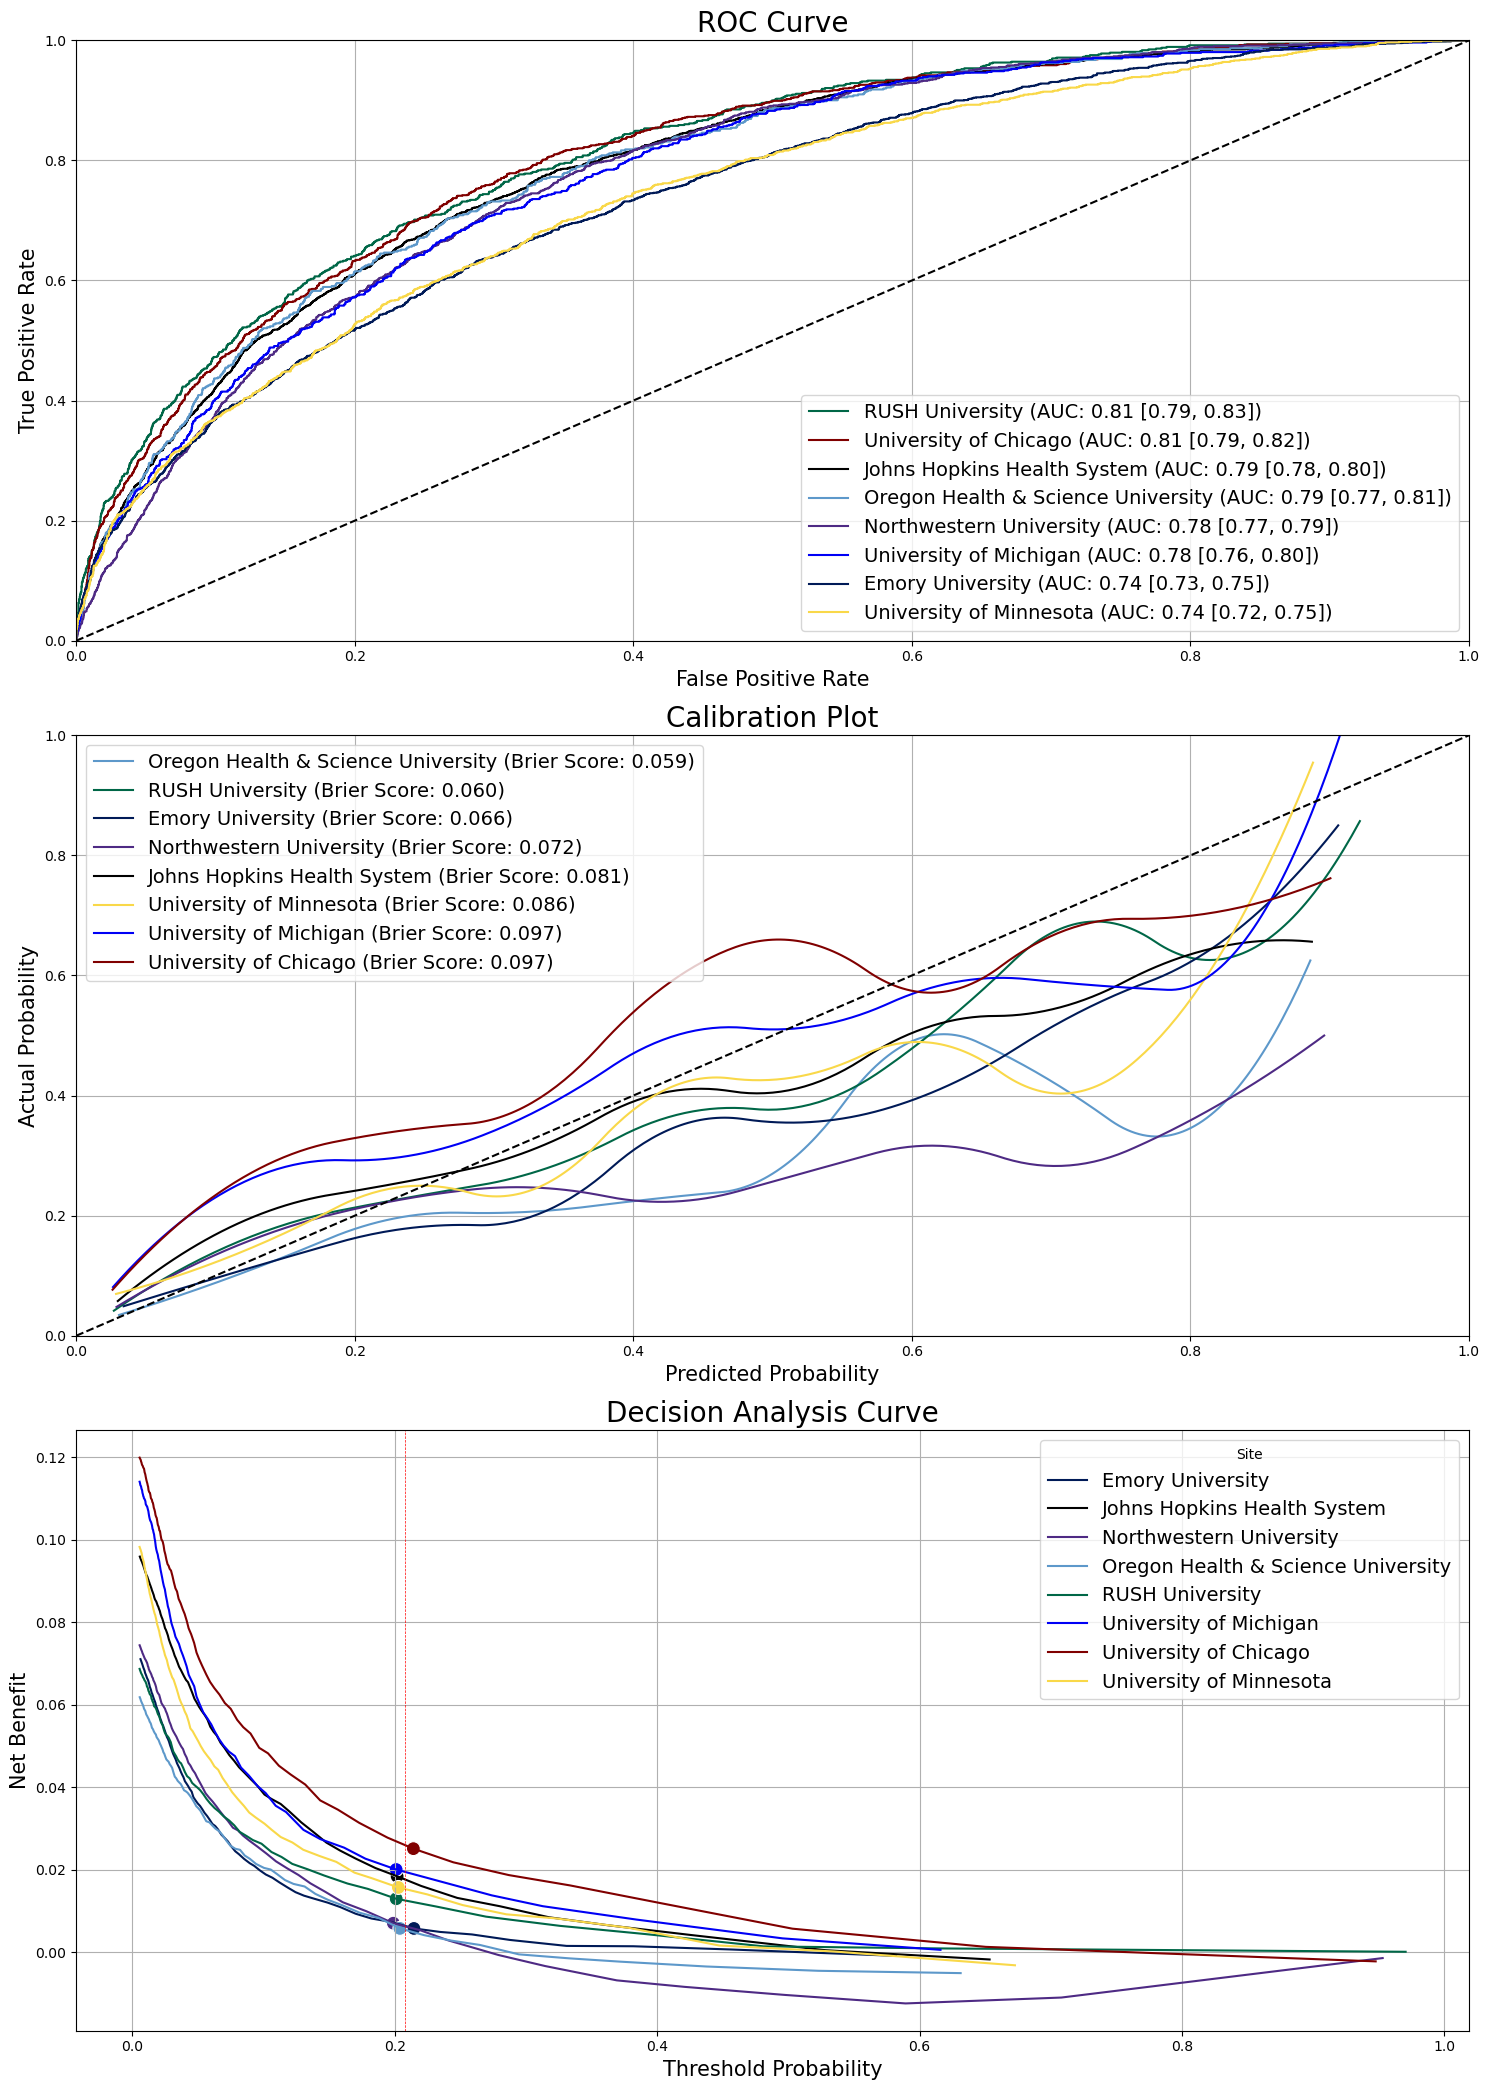

In [26]:
# Plotting
fig, axs = plt.subplots(3, 1, figsize=(15, 21))  # Adjusted for 3x1 layout

# ROC Plot
axs[0].set_title('ROC Curve', fontsize=20)
for site in sorted_sites_auc:
    site_data = merged_roc_dataframe[merged_roc_dataframe['site'] == site]
    auc = auc_values[site]
    ci_lower = auc_ci_lower[site]
    ci_upper = auc_ci_upper[site]
    label = f'{site} (AUC: {auc:.2f} [{ci_lower:.2f}, {ci_upper:.2f}])'
    axs[0].plot(site_data['fpr'], site_data['tpr'], label=label, color=site_colors.get(site, 'black'))
axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.0])
axs[0].set_xlabel('False Positive Rate', fontsize=15)
axs[0].set_ylabel('True Positive Rate', fontsize=15)
axs[0].legend(loc='lower right',fontsize=14)
axs[0].grid(True)

# Calibration Plot
axs[1].set_title('Calibration Plot', fontsize=20)
for site in sorted_sites_brier:
    site_data = merged_cal_dataframe[merged_cal_dataframe['site'] == site]
    site_data = site_data.sort_values(by='predicted_prob')
    x_new = np.linspace(site_data['predicted_prob'].min(), site_data['predicted_prob'].max(), 300)
    spl = make_interp_spline(site_data['predicted_prob'], site_data['actual_prob'], k=2)
    y_smooth = spl(x_new)
    brier_score = brier_scores[site]
    label = f'{site} (Brier Score: {brier_score:.3f})'
    axs[1].plot(x_new, y_smooth, label=label, color=site_colors.get(site, 'black'))
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('Predicted Probability', fontsize=15)
axs[1].set_ylabel('Actual Probability', fontsize=15)
axs[1].legend(loc='upper left',fontsize=14)
axs[1].grid(True)

# Clinical Utility Plot
axs[2].set_title('Decision Analysis Curve', fontsize=20)
sns.lineplot(ax=axs[2], data=merged_top_dataframe, x='Thr Value', y='net_benefit', hue='site_name', palette=site_colors, style='site_name', markers=False, dashes=False)
axs[2].axvline(x=threshold_value, color='red', linestyle='--', linewidth=0.5)
sns.scatterplot(ax=axs[2], data=intersection_points, x='Thr Value', y='net_benefit', hue='site_name', palette=site_colors, s=100, legend=False)
axs[2].set_xlabel('Threshold Probability', fontsize=15)
axs[2].set_ylabel('Net Benefit', fontsize=15)
axs[2].legend(title='Site',fontsize=14)
axs[2].grid(True)

plt.tight_layout()
fig.savefig('Final_TriPOD_plot_600dpi.png', dpi=1000)
plt.show()


# table 

In [99]:
auc_roc=merged_met_dataframe[merged_met_dataframe['Metric']=='ROC AUC']
brier=merged_met_dataframe[merged_met_dataframe['Metric']=='Brier Score Loss']

In [100]:
brier['Brier Score']=brier.apply(lambda row: f'{row["Value"]:.3f}', axis=1)
brier=brier.reset_index(drop=True).drop(columns=['Value','CI Lower','CI Upper','Metric'])
brier

C:\Users\vchaudha\AppData\Local\Temp\ipykernel_5444\448657491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brier['Brier Score']=brier.apply(lambda row: f'{row["Value"]:.3f}', axis=1)


,SiteName,Brier Score
0,Emory,0.066
1,JHU,0.081
2,NU,0.072
3,OHSU,0.059
4,RUSH,0.060
5,U of Michigan,0.097
6,UCMC,0.097
7,UMN,0.086


In [101]:
auc_roc['AUCROC'] = auc_roc.apply(lambda row: f'{row["Value"]:.2f} [{row["CI Lower"]:.2f} {row["CI Upper"]:.2f}]', axis=1)
auc_roc=auc_roc.reset_index(drop=True).drop(columns=['Value','CI Lower','CI Upper','Metric'])
auc_roc

C:\Users\vchaudha\AppData\Local\Temp\ipykernel_5444\3932865462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auc_roc['AUCROC'] = auc_roc.apply(lambda row: f'{row["Value"]:.2f} [{row["CI Lower"]:.2f} {row["CI Upper"]:.2f}]', axis=1)


,SiteName,AUCROC
0,Emory,0.74 [0.73 0.75]
1,JHU,0.79 [0.78 0.80]
2,NU,0.78 [0.77 0.79]
3,OHSU,0.79 [0.77 0.81]
4,RUSH,0.81 [0.79 0.83]
5,U of Michigan,0.78 [0.76 0.80]
6,UCMC,0.81 [0.79 0.82]
7,UMN,0.74 [0.72 0.75]


In [102]:
ip = intersection_points[['site_name', 'n', 'net_benefit']]
ip["Net Benefit"] = ip.apply(lambda row: f'{row["net_benefit"]:.3f}', axis=1)
ip=ip.reset_index(drop=True).drop(columns=['net_benefit'])
ip

C:\Users\vchaudha\AppData\Local\Temp\ipykernel_5444\3003223139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip["Net Benefit"] = ip.apply(lambda row: f'{row["net_benefit"]:.3f}', axis=1)


,site_name,n,Net Benefit
0,Emory,19924,0.006
1,JHU,18325,0.018
2,NU,14184,0.007
3,OHSU,9128,0.006
4,RUSH,9906,0.013
5,U of Michigan,6877,0.020
6,UCMC,8122,0.025
7,UMN,11576,0.016


In [103]:
from sklearn.metrics import precision_recall_curve,auc
top_files = glob.glob("pr_curve_data_*.csv")
top_dataframes = [pd.read_csv(file) for file in top_files]
merged_pr_dataframe = pd.concat(top_dataframes, ignore_index=True)

In [104]:

# Create a list to store results
results = []

# Loop through each site
for x in sites:
    # Filter the data for the specific site
    site_data = merged_pr_dataframe[merged_pr_dataframe['site'] == x]
    
    # Sort by recall to ensure correct order
    site_data = site_data.sort_values('recall')
    
    # Calculate AUPRC
    recall_values = site_data['recall'].values
    precision_values = site_data['precision'].values
    auprc = auc(recall_values, precision_values)
    
    # Append the result to the list
    results.append({'site': x, 'AUPRC': f'{auprc:.3f}'})#f'{row["net_benefit"]:.3f}'

auprc_df = pd.DataFrame(results)
auprc_df

,site,AUPRC
0,Emory,0.245
1,JHU,0.323
2,NU,0.225
3,OHSU,0.240
4,RUSH,0.319
5,U of Michigan,0.347
6,UCMC,0.402
7,UMN,0.299


In [110]:
merged_df = pd.concat([ip, auc_roc, brier, auprc_df], axis=1).drop(columns=['site','SiteName'])
merged_df.columns = merged_df.columns.str.upper()
merged_df[['SITE_NAME', 'N', 'AUCROC', 'BRIER SCORE','NET BENEFIT', 'AUPRC']]

,SITE_NAME,N,AUCROC,BRIER SCORE,NET BENEFIT,AUPRC
0,Emory,19924,0.74 [0.73 0.75],0.066,0.006,0.245
1,JHU,18325,0.79 [0.78 0.80],0.081,0.018,0.323
2,NU,14184,0.78 [0.77 0.79],0.072,0.007,0.225
3,OHSU,9128,0.79 [0.77 0.81],0.059,0.006,0.240
4,RUSH,9906,0.81 [0.79 0.83],0.060,0.013,0.319
5,U of Michigan,6877,0.78 [0.76 0.80],0.097,0.020,0.347
6,UCMC,8122,0.81 [0.79 0.82],0.097,0.025,0.402
7,UMN,11576,0.74 [0.72 0.75],0.086,0.016,0.299


In [109]:
merged_df.columns

Index(['SITE_NAME', 'N', 'NET BENEFIT', 'AUCROC', 'BRIER SCORE', 'AUPRC'], dtype='object')

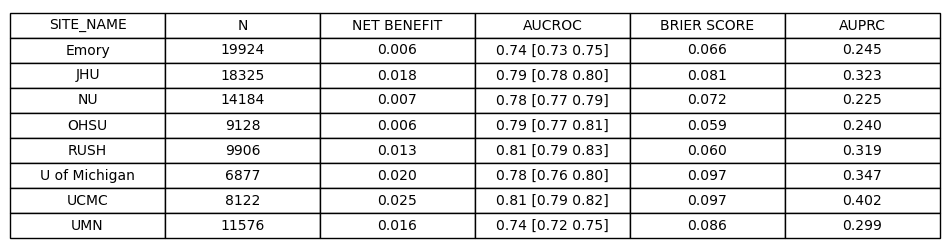

In [118]:
import matplotlib.pyplot as plt

# Assuming you have the DataFrame merged_df from the previous steps

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust the figure size as needed

# Hide the axes
ax.axis('off')

# Create a table in the subplot
table = ax.table(cellText=merged_df.values,
                 colLabels=merged_df.columns,
                 cellLoc='center',
                 loc='center')

# Adjust the table properties
table.scale(1, 1.5)  # Adjust the scale as needed
table.auto_set_font_size(False)
table.set_fontsize(10)

# Reduce padding above and below the table by adjusting the bbox_inches parameter
plt.savefig('merged_dataframe.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [113]:
merged_df.to_csv('mergerdf_for_icu_clif_model.csv',index=False)